In [104]:
import numpy as np
import timecorr as tc
import seaborn as sns
import os
from matplotlib import pyplot as plt

%matplotlib inline

In [105]:
if not os.path.isdir('figs'):
    os.mkdir('figs')
figdir = 'figs'

In [111]:
def plot_weights(weights, t=None, color='k', ax=None, xlab='Time (samples)', ylab='Weights', title=None):
    T = weights.shape[0]
    if t is None:
        t = np.round(T/2)
    ts = np.arange(T)
    
    if ax is None:
        ax = plt.gca()
    
    ax.plot(ts, weights[int(t), :], color=color)
    plt.xlim([0, T-1])
    #plt.ylim([0, 1.05])
    if not (xlab is None):
        plt.xlabel(xlab)
    
    if not (ylab is None):
        plt.ylabel(ylab)
    
    if not (title is None):
        plt.title(title)        

In [112]:
T = 100 #number of timepoints
ts = np.arange(T)
t = 50

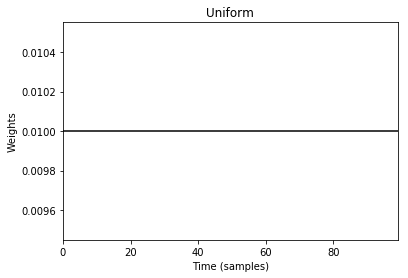

In [118]:
#uniform weights
plot_weights((1 / T) * np.ones([T, T]), title='Uniform')
plt.savefig(os.path.join(figdir, 'Uniform.pdf'))

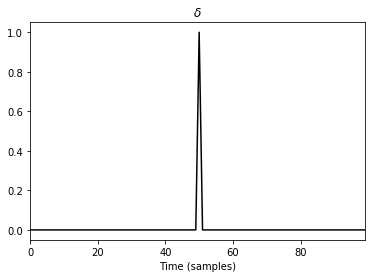

In [119]:
#delta function weights
plot_weights(tc.eye_weights(T), title='$\delta$', ylab=None)
plt.savefig(os.path.join(figdir, 'Delta.pdf'))

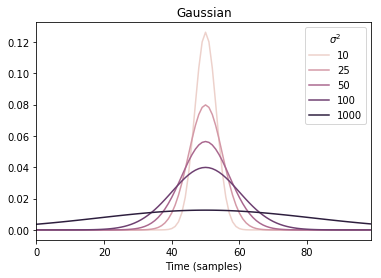

In [120]:
#gaussian function weights
sigmas = [10, 25, 50, 100, 1000]
colors = sns.cubehelix_palette(n_colors=len(sigmas))
for i, s in enumerate(sigmas):
    plot_weights(tc.gaussian_weights(T, {'var': s}), color=colors[i], ylab=None, title='Gaussian')
plt.legend(sigmas, title='$\sigma^2$')
plt.savefig(os.path.join(figdir, 'Gaussian.pdf'))

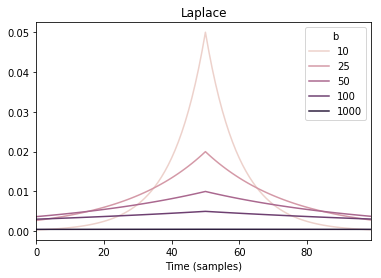

In [121]:
#laplace function weights
scales = [10, 25, 50, 100, 1000]
colors = sns.cubehelix_palette(n_colors=len(scales))
for i, s in enumerate(scales):
    plot_weights(tc.laplace_weights(T, {'scale': s}), color=colors[i], ylab=None, title='Laplace')
plt.legend(sigmas, title='b')
plt.savefig(os.path.join(figdir, 'Laplace.pdf'))